In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_json('TelecomX_Data.json')
df_normalizado = pd.json_normalize(df.to_dict(orient='records'))
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
# Explorar colunas e tipos de dados
df_normalizado.info()
df_normalizado.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [6]:
df_normalizado.head()

colunas_relevantes = [
    'Churn',
    'customer.tenure',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod',
    'account.Charges.Monthly',
    'account.Charges.Total',
    'internet.InternetService',
    'phone.PhoneService',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents'
]
df_normalizado[colunas_relevantes].head()

,Churn,customer.tenure,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,internet.InternetService,phone.PhoneService,customer.SeniorCitizen,customer.Partner,customer.Dependents
0,No,9,One year,Yes,Mailed check,65.6,593.3,DSL,Yes,0,Yes,Yes
1,No,9,Month-to-month,No,Mailed check,59.9,542.4,DSL,Yes,0,No,No
2,Yes,4,Month-to-month,Yes,Electronic check,73.9,280.85,Fiber optic,Yes,0,No,No
3,Yes,13,Month-to-month,Yes,Electronic check,98.0,1237.85,Fiber optic,Yes,1,Yes,No
4,Yes,3,Month-to-month,Yes,Mailed check,83.9,267.4,Fiber optic,Yes,1,Yes,No


In [7]:
# Verifica valores ausentes
print(df_normalizado[colunas_relevantes].isnull().sum())

# Verifica duplicatas
print("Duplicados:", df_normalizado.duplicated().sum())

# Exibe exemplos de erros de formatação e inconsistências em categorias
for col in colunas_relevantes:
    if df_normalizado[col].dtype == 'object':
        print(f"Valores únicos em {col}:", df_normalizado[col].unique())

Churn                       0
customer.tenure             0
account.Contract            0
account.PaperlessBilling    0
account.PaymentMethod       0
account.Charges.Monthly     0
account.Charges.Total       0
internet.InternetService    0
phone.PhoneService          0
customer.SeniorCitizen      0
customer.Partner            0
customer.Dependents         0
dtype: int64
Duplicados: 0
Valores únicos em Churn: ['No' 'Yes' '']
Valores únicos em account.Contract: ['One year' 'Month-to-month' 'Two year']
Valores únicos em account.PaperlessBilling: ['Yes' 'No']
Valores únicos em account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Valores únicos em account.Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
Valores únicos em internet.InternetService: ['DSL' 'Fiber optic' 'No']
Valores únicos em phone.PhoneService: ['Yes' 'No']
Valores únicos em customer.Partner: ['Yes' 'No']
Valores únicos em customer.Dependent

In [8]:
for col in colunas_relevantes:
    if df_normalizado[col].dtype == 'object':
        df_normalizado[col] = df_normalizado[col].fillna('Não informado')
    else:
        df_normalizado[col] = df_normalizado[col].fillna(0)

# Remover duplicatas
df_normalizado.drop_duplicates(inplace=True)

# Padronizar categorias (exemplo para a coluna 'Churn')
df_normalizado['Churn'] = df_normalizado['Churn'].str.strip().str.lower().replace({'yes': 'Sim', 'no': 'Não'})

# Conferir se as correções foram aplicadas
print(df_normalizado[colunas_relevantes].isnull().sum())
print("Duplicados:", df_normalizado.duplicated().sum())

Churn                       0
customer.tenure             0
account.Contract            0
account.PaperlessBilling    0
account.PaymentMethod       0
account.Charges.Monthly     0
account.Charges.Total       0
internet.InternetService    0
phone.PhoneService          0
customer.SeniorCitizen      0
customer.Partner            0
customer.Dependents         0
dtype: int64
Duplicados: 0


In [9]:
df_normalizado['Contas_Diarias'] = df_normalizado['account.Charges.Monthly'] / 30

print(df_normalizado[['account.Charges.Monthly', 'Contas_Diarias']].head())

   account.Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667


In [10]:
# Converte "Sim"/"Não" em 1/0
mapa_binario = {'Sim': 1, 'Não': 0, 'Não informado': np.nan}
for col in ['Churn', 'account.PaperlessBilling', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService']:
    if col in df_normalizado.columns:
        df_normalizado[col + '_bin'] = df_normalizado[col].map(mapa_binario)

# Renomeia colunas para facilitar a leitura
df_normalizado.rename(columns={
    'account.Charges.Monthly': 'Faturamento_Mensal',
    'account.Charges.Total': 'Faturamento_Total',
    'customer.tenure': 'Tempo_Cliente'
}, inplace=True)
# Exibe as primeiras linhas do DataFrame atualizado
print(df_normalizado.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO   Não          Female                       0              Yes   
1  0003-MKNFE   Não            Male                       0               No   
2  0004-TLHLJ   Sim            Male                       0               No   
3  0011-IGKFF   Sim            Male                       1              Yes   
4  0013-EXCHZ   Sim          Female                       1              Yes   

  customer.Dependents  Tempo_Cliente phone.PhoneService phone.MultipleLines  \
0                 Yes              9                Yes                  No   
1                  No              9                Yes                 Yes   
2                  No              4                Yes                  No   
3                  No             13                Yes                  No   
4                  No              3                Yes                  No   

  internet.InternetService  ... account.Pape

In [11]:
df_normalizado.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,Tempo_Cliente,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,account.PaperlessBilling,account.PaymentMethod,Faturamento_Mensal,Faturamento_Total,Contas_Diarias,Churn_bin,account.PaperlessBilling_bin,customer.Partner_bin,customer.Dependents_bin,phone.PhoneService_bin
0,0002-ORFBO,Não,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Mailed check,65.6,593.3,2.186667,0.0,NaN,NaN,NaN,NaN
1,0003-MKNFE,Não,Male,0,No,No,9,Yes,Yes,DSL,...,No,Mailed check,59.9,542.4,1.996667,0.0,NaN,NaN,NaN,NaN
2,0004-TLHLJ,Sim,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,Electronic check,73.9,280.85,2.463333,1.0,NaN,NaN,NaN,NaN
3,0011-IGKFF,Sim,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Electronic check,98.0,1237.85,3.266667,1.0,NaN,NaN,NaN,NaN
4,0013-EXCHZ,Sim,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Mailed check,83.9,267.4,2.796667,1.0,NaN,NaN,NaN,NaN


In [12]:
# Identifica e remove todas as colunas que terminam com '_bin'
colunas_bin = [col for col in df_normalizado.columns if col.endswith('_bin')]
df_normalizado.drop(columns=colunas_bin, inplace=True)

In [13]:
df_normalizado.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,Tempo_Cliente,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Faturamento_Mensal,Faturamento_Total,Contas_Diarias
0,0002-ORFBO,Não,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667
1,0003-MKNFE,Não,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667
2,0004-TLHLJ,Sim,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Sim,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Sim,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.796667


In [14]:

# Análise descritiva das variáveis numéricas
print(df_normalizado.describe().T)

# Análise descritiva das variáveis categóricas
colunas_categoricas = df_normalizado.select_dtypes(include='object').columns
for col in colunas_categoricas:
    print(f'\nDistribuição de {col}:')
    print(df_normalizado[col].value_counts())

                         count       mean        std        min        25%  \
customer.SeniorCitizen  7267.0   0.162653   0.369074   0.000000   0.000000   
Tempo_Cliente           7267.0  32.346498  24.571773   0.000000   9.000000   
Faturamento_Mensal      7267.0  64.720098  30.129572  18.250000  35.425000   
Contas_Diarias          7267.0   2.157337   1.004319   0.608333   1.180833   

                              50%        75%         max  
customer.SeniorCitizen   0.000000   0.000000    1.000000  
Tempo_Cliente           29.000000  55.000000   72.000000  
Faturamento_Mensal      70.300000  89.875000  118.750000  
Contas_Diarias           2.343333   2.995833    3.958333  

Distribuição de customerID:
customerID
0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: count, Length: 7267, dtype: int64

Distribuição de Churn:
Churn
Não    5174
Sim    1869
    

In [15]:
# Análise descritiva das variáveis numéricas
print(df_normalizado.describe().T)

# Mediana das variáveis numéricas
print('\nMediana:')
print(df_normalizado.median(numeric_only=True))

# Moda das variáveis numéricas
print('\nModa:')
print(df_normalizado.mode(numeric_only=True).iloc[0])

# Desvio padrão das variáveis numéricas
print('\nDesvio padrão:')
print(df_normalizado.std(numeric_only=True))

                         count       mean        std        min        25%  \
customer.SeniorCitizen  7267.0   0.162653   0.369074   0.000000   0.000000   
Tempo_Cliente           7267.0  32.346498  24.571773   0.000000   9.000000   
Faturamento_Mensal      7267.0  64.720098  30.129572  18.250000  35.425000   
Contas_Diarias          7267.0   2.157337   1.004319   0.608333   1.180833   

                              50%        75%         max  
customer.SeniorCitizen   0.000000   0.000000    1.000000  
Tempo_Cliente           29.000000  55.000000   72.000000  
Faturamento_Mensal      70.300000  89.875000  118.750000  
Contas_Diarias           2.343333   2.995833    3.958333  

Mediana:
customer.SeniorCitizen     0.000000
Tempo_Cliente             29.000000
Faturamento_Mensal        70.300000
Contas_Diarias             2.343333
dtype: float64

Moda:
customer.SeniorCitizen     0.000000
Tempo_Cliente              1.000000
Faturamento_Mensal        20.050000
Contas_Diarias             0.6

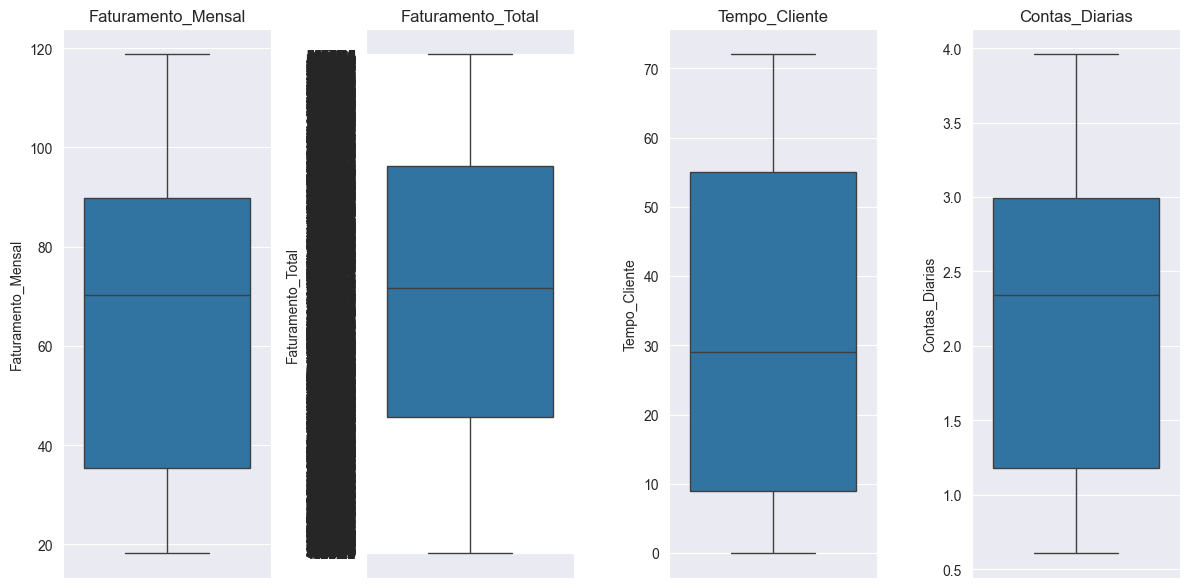

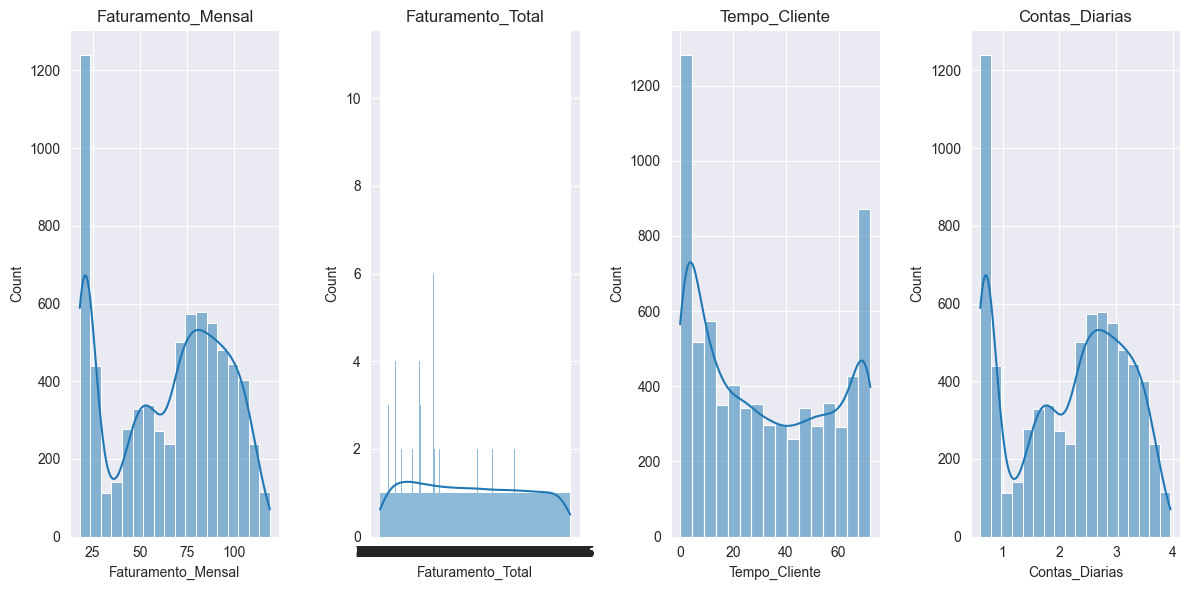

TypeError: Cannot convert [['593.3' '542.4' '280.85' ... '92.75' '4627.65' '3707.6']] to numeric

In [16]:
# Lista das variáveis numéricas principais
variaveis_numericas = ['Faturamento_Mensal', 'Faturamento_Total', 'Tempo_Cliente', 'Contas_Diarias']

# Boxplots para visualizar a distribuição e outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(variaveis_numericas):
    plt.subplot(1, len(variaveis_numericas), i+1)
    sns.boxplot(y=df_normalizado[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Histogramas para visualizar a distribuição
plt.figure(figsize=(12, 6))
for i, col in enumerate(variaveis_numericas):
    plt.subplot(1, len(variaveis_numericas), i+1)
    sns.histplot(df_normalizado[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Gráfico de barras para a mediana de cada variável
medianas = df_normalizado[variaveis_numericas].median()
plt.figure(figsize=(8, 4))
sns.barplot(x=medianas.index, y=medianas.values)
plt.title('Mediana das Variáveis Numéricas')
plt.ylabel('Mediana')
plt.tight_layout()
plt.show()

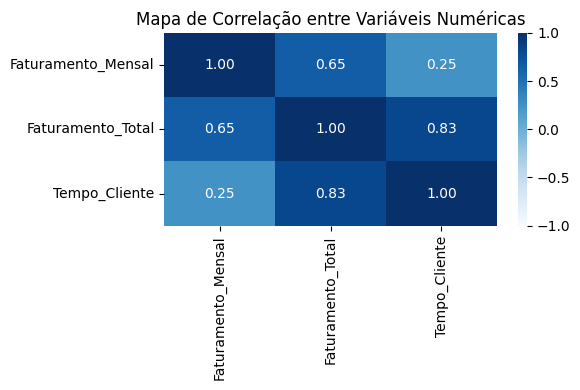

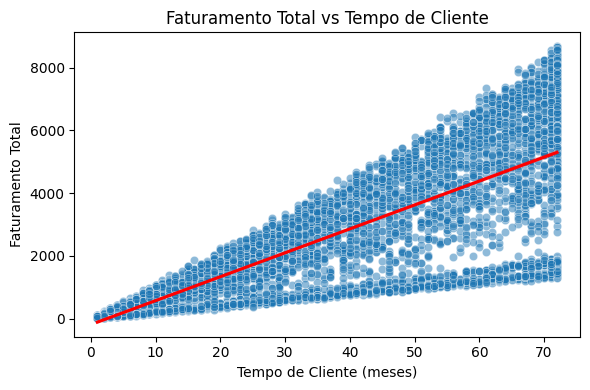

In [71]:
# Calcula a matriz de correlação
corr = df_normalizado[['Faturamento_Mensal', 'Faturamento_Total', 'Tempo_Cliente']].corr()

# Heatmap de correlação
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', vmin=-1, vmax=1)
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

# Relação entre Faturamento Total e Tempo de Cliente
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Tempo_Cliente', y='Faturamento_Total', data=df_normalizado, alpha=0.5)
sns.regplot(x='Tempo_Cliente', y='Faturamento_Total', data=df_normalizado, scatter=False, color='red')
plt.title('Faturamento Total vs Tempo de Cliente')
plt.xlabel('Tempo de Cliente (meses)')
plt.ylabel('Faturamento Total')
plt.tight_layout()
plt.show()

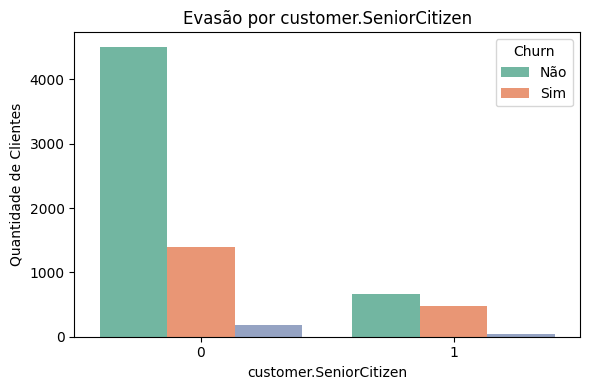

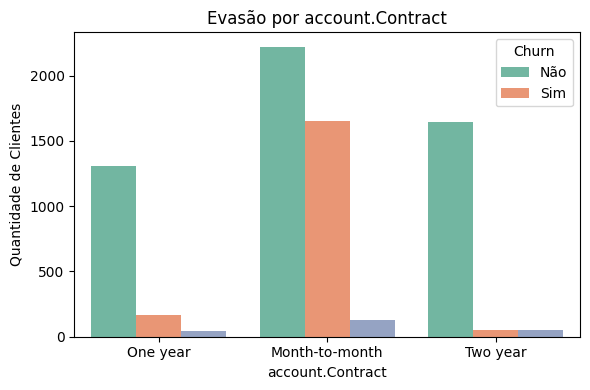

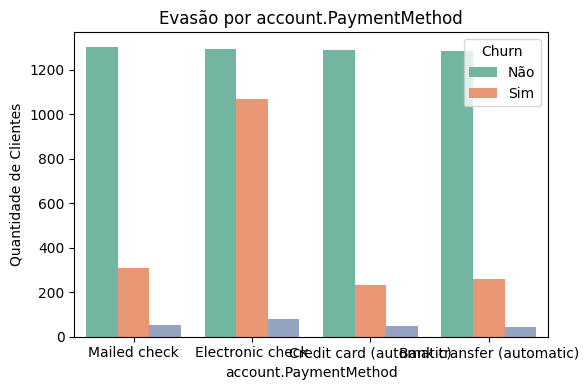

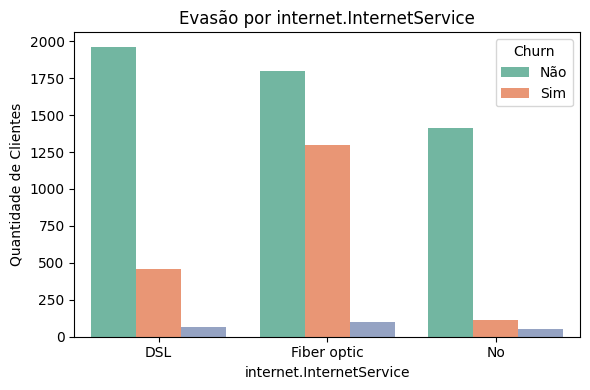

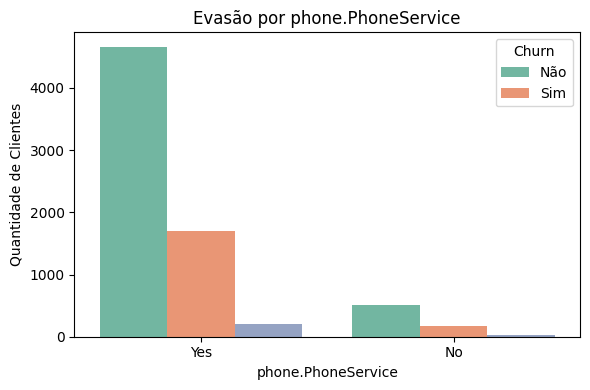

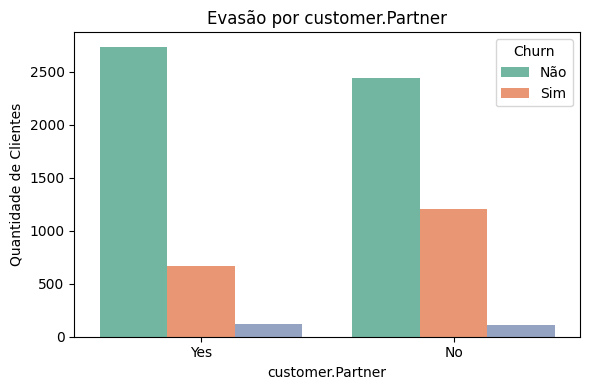

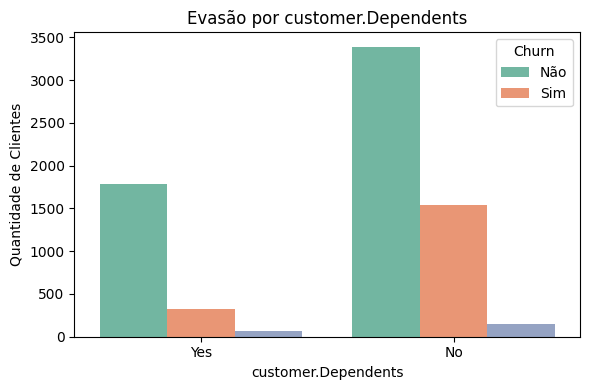

In [76]:
# Lista de variáveis categóricas para análise
variaveis_categoricas = [
    'customer.SeniorCitizen',
    'account.Contract',
    'account.PaymentMethod',
    'internet.InternetService',
    'phone.PhoneService',
    'customer.Partner',
    'customer.Dependents'
]

for col in variaveis_categoricas:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Churn', data=df_normalizado, palette='Set2')
    plt.title(f'Evasão por {col}')
    plt.ylabel('Quantidade de Clientes')
    plt.xlabel(col)
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

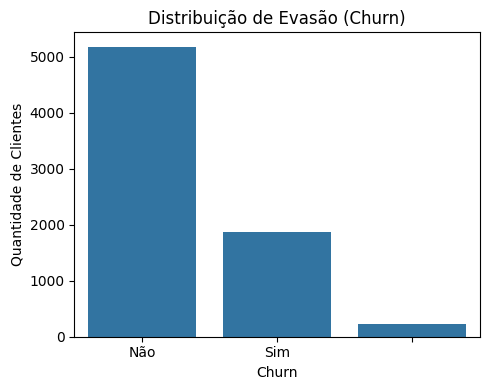

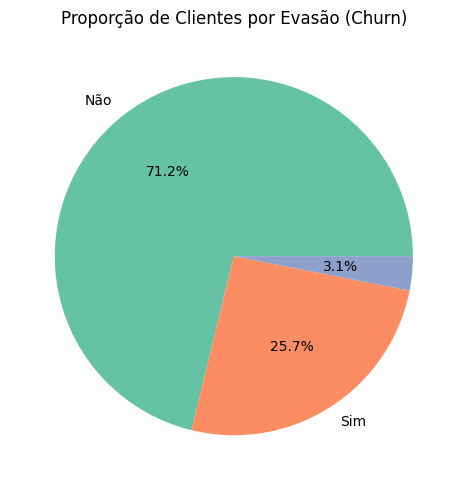

In [78]:
# Gráfico de barras para churn
plt.figure(figsize=(5, 4))
sns.countplot(x='Churn', data=df_normalizado)
plt.title('Distribuição de Evasão (Churn)')
plt.xlabel('Churn')
plt.ylabel('Quantidade de Clientes')
plt.tight_layout()
plt.show()

# Gráfico de pizza para proporção de churn
churn_counts = df_normalizado['Churn'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Proporção de Clientes por Evasão (Churn)')
plt.tight_layout()
plt.show()

In [ ]:
# O boxplot mostra a mediana, quartis e possíveis outliers de cada grupo.
# O histograma permite comparar a distribuição dos valores entre clientes que cancelaram e os que permaneceram.
# Esses gráficos ajudam a identificar se clientes que cancelam têm, por exemplo, menor tempo de contrato ou menor/mayor total gasto.


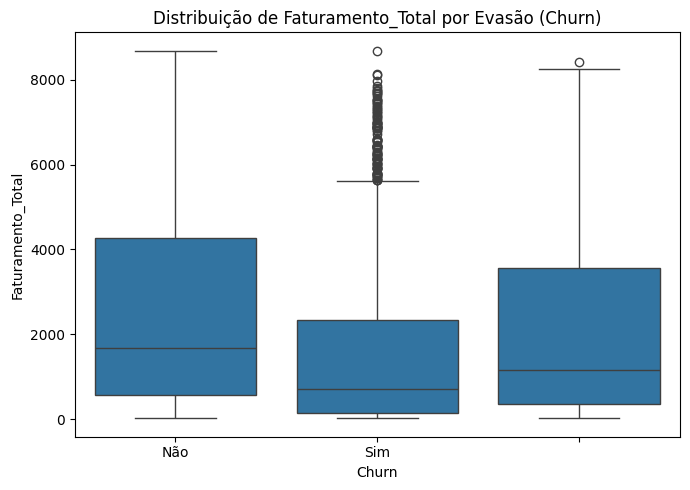

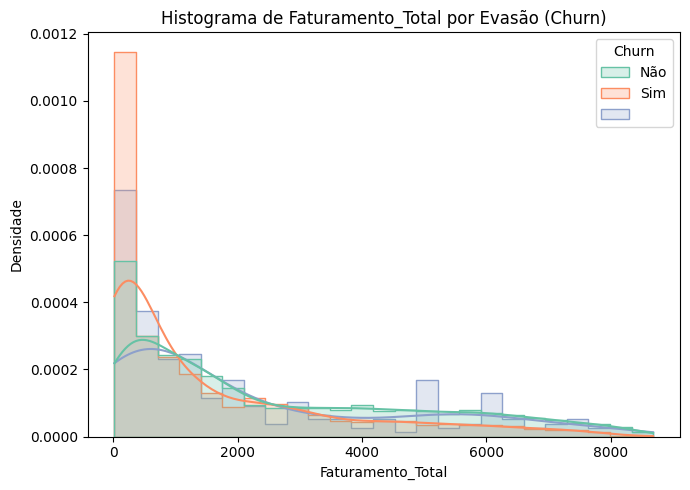

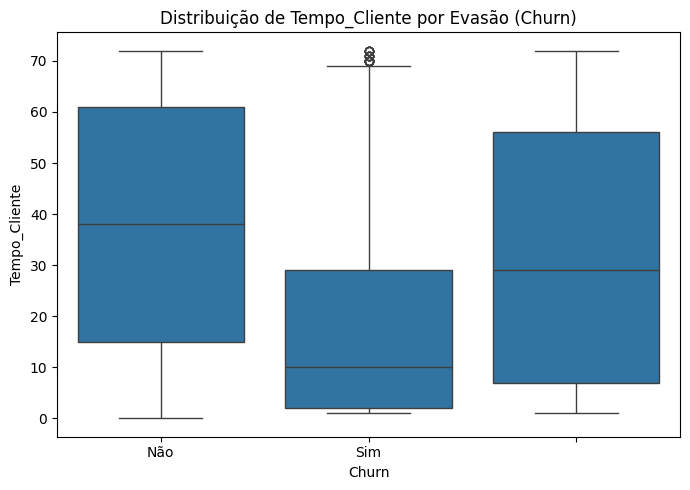

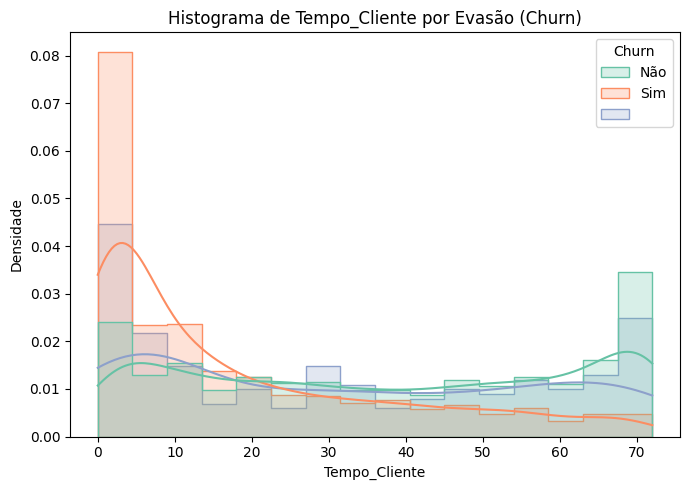

In [82]:
# Análise de variáveis numéricas em relação ao churn
variaveis_numericas = ['Faturamento_Total', 'Tempo_Cliente']

for var in variaveis_numericas:
    plt.figure(figsize=(7, 5))
    sns.boxplot(x='Churn', y=var, data=df_normalizado)
    plt.title(f'Distribuição de {var} por Evasão (Churn)')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(7, 5))
    sns.histplot(data=df_normalizado, x=var, hue='Churn', kde=True, element='step', stat='density', common_norm=False, palette='Set2')
    plt.title(f'Histograma de {var} por Evasão (Churn)')
    plt.xlabel(var)
    plt.ylabel('Densidade')
    plt.tight_layout()
    plt.show()

# Relatório de Análise de Evasão de Clientes (Churn) - TelecomX

## 1. Introdução

O objetivo deste projeto é analisar o fenômeno de evasão de clientes (churn) na base de dados da TelecomX. A evasão representa clientes que cancelam seus serviços, impactando negativamente a receita da empresa. Compreender os fatores associados ao churn é fundamental para direcionar estratégias de retenção e melhorar a experiência do cliente.

## 2. Limpeza e Tratamento de Dados

- Importação dos dados a partir do arquivo `TelecomX_Data.json`.
- Normalização dos dados para facilitar o acesso às colunas.
- Identificação e tratamento de valores ausentes: substituição por `'Não informado'` em variáveis categóricas e `0` em numéricas.
- Remoção de duplicatas.
- Padronização de categorias, como a coluna `Churn` para valores `'Sim'` e `'Não'`.
- Criação de variáveis derivadas, como `Contas_Diarias` (faturamento mensal dividido por 30).

## 3. Análise Exploratória de Dados

### 3.1. Distribuição das Variáveis Numéricas

Foram utilizados boxplots e histogramas para visualizar a distribuição, mediana e possíveis outliers das variáveis `Faturamento_Mensal`, `Faturamento_Total`, `Tempo_Cliente` e `Contas_Diarias`.

### 3.2. Correlação entre Variáveis

A matriz de correlação e o heatmap mostraram relações entre faturamento, tempo de cliente e outros indicadores numéricos.

### 3.3. Distribuição do Churn

Gráficos de barras e pizza evidenciaram a proporção de clientes que permaneceram e os que cancelaram o serviço.

### 3.4. Churn por Variáveis Categóricas

Gráficos de barras segmentados por `Churn` permitiram identificar perfis de clientes com maior ou menor propensão à evasão, considerando variáveis como tipo de contrato, método de pagamento, serviço de internet, entre outros.

### 3.5. Variáveis Numéricas vs Churn

Boxplots e histogramas segmentados por `Churn` mostraram que clientes que cancelam tendem a ter menor tempo de contrato e menor faturamento total.

## 4. Conclusões e Insights

- A maioria dos clientes permanece, mas a taxa de churn é relevante.
- Clientes com contratos mensais e menor tempo de casa apresentam maior propensão à evasão.
- Certos métodos de pagamento e tipos de contrato estão associados a taxas mais altas de churn.
- Serviços adicionais e faturamento digital também influenciam o comportamento de evasão.

## 5. Recomendações

- Focar em estratégias de retenção para clientes com contratos mensais e baixo tempo de relacionamento.
- Oferecer incentivos para migração para contratos mais longos.
- Monitorar clientes com métodos de pagamento associados a maior churn.
- Realizar campanhas educativas sobre benefícios de serviços adicionais e faturamento digital.

---

> **Obs.:** As visualizações e análises detalhadas estão nas células de código do notebook, sustentando as conclusões apresentadas.